In [15]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap

model = RandomForestRegressor(max_depth=85, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
scaler = StandardScaler()
# pipeline = Pipeline(steps=[('normalize', scaler), ('model', model)])

In [16]:
df = pd.read_csv("../test_data/patch_antenna/Patch Antenna S11 Data.csv").sample(5000)
input_x = df.drop(columns=['dB(S(1,1)) []'], axis=1)
input_x.rename(columns={'inset_dist [mm]': 'inset_dist', 'L [mm]': 'L', 'sub_thick [mm]': 'sub_thick', 'W [mm]': 'W', 'W0 [mm]': 'W0', 'y0 [mm]': 'y0', 'Freq [GHz]': 'Freq'}, inplace=True)
input_y = df[['dB(S(1,1)) []']]

In [17]:
x_scaled = scaler.fit_transform(input_x)

In [18]:
model = model.fit(x_scaled, input_y.values.ravel())

In [19]:
explainer = shap.Explainer(model, x_scaled)

In [20]:
shap_values = explainer(x_scaled,check_additivity=False)

100%|===================| 4995/5000 [17:55<00:01]        

In [21]:
shap_values.feature_names = input_x.columns

In [22]:
x_scaled

array([[ 0.01255442,  1.23115933,  0.        , ..., -1.21234839,
         1.38539631, -0.96048992],
       [ 0.01255442,  0.00977111,  0.        , ..., -1.21234839,
        -0.713477  ,  0.95999608],
       [ 0.01255442,  1.23115933,  0.        , ..., -1.21234839,
        -1.41310144, -0.68613478],
       ...,
       [ 0.01255442,  0.00977111,  0.        , ...,  0.01274093,
         1.38539631,  0.3769914 ],
       [-1.21827102,  1.23115933,  0.        , ..., -1.21234839,
         0.68577187,  0.78852411],
       [ 0.01255442, -1.21161712,  0.        , ...,  0.01274093,
         1.38539631,  1.40582318]])

In [23]:
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Explaining%20a%20model%20that%20uses%20standardized%20features.html
shap_values.data = input_x.values

In [24]:
shap_values

.values =
array([[ 0.00887407, -0.21683224,  0.        , ...,  0.09731912,
        -0.21427598,  2.33388937],
       [-0.00617801,  0.00700564,  0.        , ...,  0.27104844,
         0.51690656,  0.83235858],
       [-0.02094223, -0.51470741,  0.        , ..., -0.07619553,
         0.27275173, -0.2405239 ],
       ...,
       [ 0.01277788,  0.03439159,  0.        , ..., -0.0373436 ,
         0.01217597,  2.06130231],
       [ 0.08438371, -0.06582024,  0.        , ...,  0.2574247 ,
        -0.19314264,  1.74985817],
       [ 0.12621092,  0.72192117,  0.        , ..., -0.12384669,
        -1.24825385, -5.05938401]])

.base_values =
array([-3.14039599, -3.14039599, -3.14039599, ..., -3.14039599,
       -3.14039599, -3.14039599])

.data =
array([[ 1.  , 12.5 ,  2.  , ...,  2.5 ,  5.  ,  5.76],
       [ 1.  , 12.  ,  2.  , ...,  2.5 ,  3.5 , 10.24],
       [ 1.  , 12.5 ,  2.  , ...,  2.5 ,  3.  ,  6.4 ],
       ...,
       [ 1.  , 12.  ,  2.  , ...,  3.  ,  5.  ,  8.88],
       [ 0.6 , 12.

In [32]:
# import pickle
# with open('shap_values.pkl', 'wb') as f:
#     pickle.dump(shap_values, f)

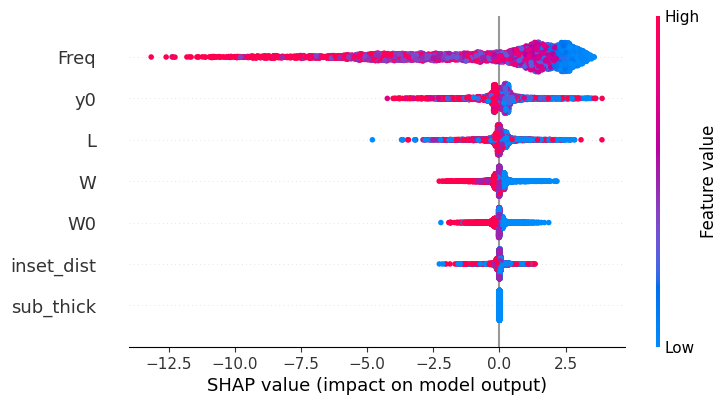

In [26]:
shap.plots.beeswarm(shap_values)

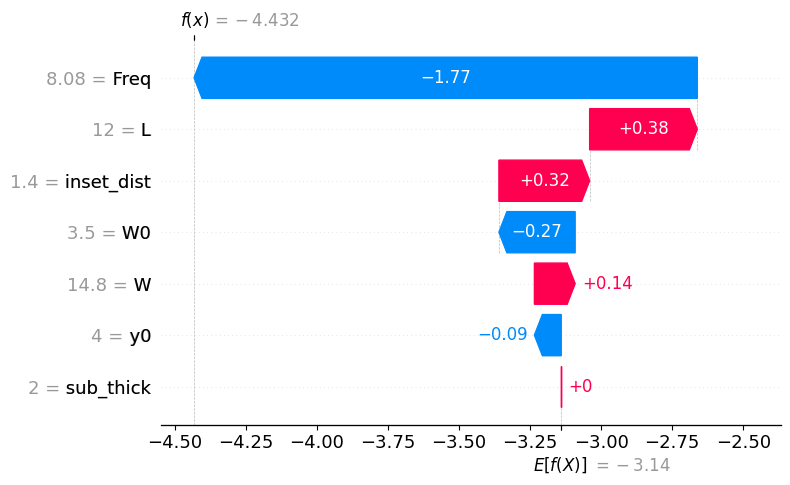

In [37]:

shap.plots.waterfall(shap_values[300])